#### CSC 180 Intelligent Systems 

#### Dr. Haiquan Chen, Dept of Computer Scicence

#### California State University, Sacramento




### Please follow the instructions in the slides to install Anaconda and TensorFLow

[Anaconda](https://www.anaconda.com/download/) is the world’s most popular Python data science platform, with 1,000+
data science packages.



## Test your enviroment by runing the following code:

In [1]:
# What version of Python do you have?

import tensorflow as tf
import numpy as np
import sys
import sklearn as sk
import pandas as pd

print("Python {}".format(sys.version))
print('Pandas {}'.format(pd.__version__))
print('Numpy {}'.format(np.__version__))
print('Scikit-Learn {}'.format(sk.__version__))
print()
print("Tensor Flow Version: {}".format(tf.__version__))
print("Keras Version: {}".format(tf.keras.__version__))


2024-09-11 11:36:57.349503: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Python 3.11.5 (main, Sep 11 2023, 08:40:08) [Clang 14.0.6 ]
Pandas 2.2.2
Numpy 1.23.5
Scikit-Learn 1.5.1

Tensor Flow Version: 2.12.0
Keras Version: 2.12.0


# Lab 0:  Numpy: high-performance vector operations


<img src="https://cdn-images-1.medium.com/fit/t/1600/480/1*Y2v3PrF1rUQRUHwOcXJznA.png" width="600">


# 1. Numpy

The `numpy` package (module) is used in almost all numerical computation using Python. It is a package that provide high-performance vector, matrix and higher-dimensional data structures for Python. It is implemented in C and Fortran so when calculations are vectorized (formulated with vectors and matrices), performance is very good. 

To use `numpy` first import the module:

In [2]:
import numpy as np  # np is the most common import name for numpy

In the `numpy` package the terminology used for vectors, matrices and higher-dimensional data sets is *array*. 



## Creating `numpy` arrays (vectors or matrices)

There are a number of ways to initialize new numpy arrays, for example from

* a Python list or tuples
* using functions that are dedicated to generating numpy arrays, such as `arange`, `linspace`, etc.
* reading data from files

### From lists

For example, to create new vector and matrix arrays from Python lists we can use the `numpy.array` function.

In [3]:
# a vector: the argument to the array function is a Python list
v = np.array([1, 2, 3, 4])
v

array([1, 2, 3, 4])

In [5]:
# a matrix (or better a 2d array): the argument to the array function is a nested Python list
M = np.array([[1, 2], [3, 4]])
M

array([[1, 2],
       [3, 4]])

The `v` and `M` objects are both of the type `ndarray` that the `numpy` module provides.

In [4]:
# ndarry means n-dimensional array
# v is 1D and M is 2D
type(v), type(M)

(numpy.ndarray, numpy.ndarray)

The difference between the `v` and `M` arrays is only their shapes. We can get information about the shape of an array by using the `ndarray.shape` property.

In [5]:
# (row size, column size)
v.shape

(4,)

In [6]:
M.shape

(2, 2)

The number of elements in the array is available through the `ndarray.size` property:

In [7]:
# all elements in the array
v.size

4

In [8]:
M.size  # be careful matlab size is shape with Numpy

4

***So far the `numpy.ndarray` looks much like a Python list. 

### Why not simply use Python lists for computations instead of creating a new array type?

There are several reasons:

* Numpy arrays are ***memory efficient*** and run ***much faster*** than Python lists in order to support ***big data***.
* Python lists DO NOT support ***mathematical functions*** such as matrix and dot multiplications, etc. Implementating such functions for Python lists would be very inefficient. 
* Python lists are very general. They can contain any kind of object. * Numpy arrays are  **homogeneous**. The type of the elements is determined when array is created.***


Using the `dtype` (data type) property of an `ndarray`, we can see what type each element of an array has:

In [9]:
# dtype stands for data type
M.dtype

dtype('int32')

We get an error if we try to assign a value of the wrong type to an element in a numpy array:

In [10]:
M[0, 0] = "hello"

ValueError: invalid literal for int() with base 10: 'hello'

If we want, we can ***explicitly define the type of the array data*** when we create it, using the `dtype` keyword argument: 

In [11]:
M = np.array([[1, 2], [3, 4]], dtype='float32')
M

array([[1., 2.],
       [3., 4.]], dtype=float32)

Common type that can be used with `dtype` are: `int`, `float`, `complex`, `bool`, `object`, etc.

We can also explicitly define the bit size of the data types, for example: `int64`, `int16`, `float128`, `complex128`.

### Using functions to generate arrays

For larger arrays it is inpractical to initialize the data manually, using explicit python lists. Instead we can use one of the many functions in `numpy` that generates arrays of different forms. Some of the more common are:

#### arange

In [12]:
# create a range
# ** Stop not included
x = np.arange(0, 10, 1) # arguments: start, stop, step
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
x = np.arange(-1, 1, 0.1)
x

array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01])

#### linspace and logspace

In [7]:
# using linspace, both end points ARE included
np.linspace(0, 10, 25)

array([ 0.        ,  0.41666667,  0.83333333,  1.25      ,  1.66666667,
        2.08333333,  2.5       ,  2.91666667,  3.33333333,  3.75      ,
        4.16666667,  4.58333333,  5.        ,  5.41666667,  5.83333333,
        6.25      ,  6.66666667,  7.08333333,  7.5       ,  7.91666667,
        8.33333333,  8.75      ,  9.16666667,  9.58333333, 10.        ])

In [8]:
np.logspace(0, 10, 10, base=10)

array([1.00000000e+00, 1.29154967e+01, 1.66810054e+02, 2.15443469e+03,
       2.78255940e+04, 3.59381366e+05, 4.64158883e+06, 5.99484250e+07,
       7.74263683e+08, 1.00000000e+10])

## Manipulating arrays

### Indexing

We can index elements in an array using the square bracket and indices:

In [9]:
v = np.array([1, 2, 3, 4])

# v is a vector, and has only one dimension, taking one index
v[0]

1

In [10]:
M = np.array([[1, 2], [3, 4]])

# M is a matrix, or a 2 dimensional array, taking two indices 
M[1, 1]

4

In [11]:
M

array([[1, 2],
       [3, 4]])

In [12]:
# all the elements in row 1
M[1, :] # row 1

array([3, 4])

In [13]:
# all elements in column 1
M[:, 1] # column 1

array([2, 4])

We can assign new values to elements in an array using indexing:

In [14]:
# set element at (row, column) to the value 
  # IF value matches the dtype of the array
M[0, 0] = 10
M

array([[10,  2],
       [ 3,  4]])

In [19]:
# also works for rows and columns

# Set all values in row 0 to 0
M[0, :] = 0
print(M)

# set all values in column 1 to -1
M[:, 1] = -1
print(M)

[[ 0  0]
 [ 3 -1]]
[[ 0 -1]
 [ 3 -1]]


In [21]:
M

array([[ 0, -1],
       [ 3, -1]])

### Index slicing

Index slicing is the technical name for the syntax `M[start:end:step]` to extract part of an array:

In [20]:
A = np.array([1,2,3,4,5])
A

array([1, 2, 3, 4, 5])

In [22]:
# does not include end
A[1:3]

array([2, 3])

#### Array slices are *mutable*

If they are assigned a new value the original array from which the slice was extracted is modified:

In [23]:
# replacing only the extracted values
A[1:3] = [-2, -3]

A

array([ 1, -2, -3,  4,  5])

We can omit any of the three parameters in `M[start:end:step]`:

In [24]:
A[::] # lower, upper, step all take the default values

array([ 1, -2, -3,  4,  5])

In [25]:
# step is added to the index so 0, 0 + 2, 2 + 2
A[::2] # step is 2, lower and upper defaults to the beginning and end of the array

array([ 1, -3,  5])

In [26]:
A[:3] # first three elements

array([ 1, -2, -3])

In [27]:
A[3:] # elements from index 3

array([4, 5])

Negative indices counts from the end of the array (positive index from the begining):

In [28]:
A = np.array([1, 2, 3, 4, 5])

In [29]:
A[-1] # the last element in the array

5

In [30]:
A[-3:] # the last three elements

array([3, 4, 5])

### Index slicing works exactly the same way for multidimensional arrays:

You may also use an array or list as an index:

In [32]:
A = np.array([[n+(m*10) for n in range(5)] for m in range(5)])

A   # a matrix

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [33]:
row_indices = [1, 2, 3]
A[row_indices,:]

array([[10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34]])

In [34]:
col_indices = [1, 2, -1] # remember, index -1 means the last element
A[:,col_indices]

array([[ 1,  2,  4],
       [11, 12, 14],
       [21, 22, 24],
       [31, 32, 34],
       [41, 42, 44]])

In [35]:
# a block from the original array
A[1:4, 1:4]

array([[11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

## Array-oriented programming

### Vectorizing code is the key to writing code when handling big data. That means that as much as possible, a program should be written in terms of matrix (vector) operations.

### Scalar-array operations

We can use the usual arithmetic operators to multiply, add, subtract, and divide arrays with scalar numbers.

In [36]:
v1 = np.arange(0, 5)
v1

array([0, 1, 2, 3, 4])

In [40]:
# multiply all elements by 2
# however this does not change the original v1 array
v1 * 2

array([0, 2, 4, 6, 8])

In [41]:
v1 + 2

array([2, 3, 4, 5, 6])

### Element-wise array-array operations

When we add, subtract, multiply and divide arrays with each other, the default behaviour is **element-wise** operations:

In [42]:
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [43]:
A * A 
# element-wise multiplication
# elements in the same spot are multiplied

array([[   0,    1,    4,    9,   16],
       [ 100,  121,  144,  169,  196],
       [ 400,  441,  484,  529,  576],
       [ 900,  961, 1024, 1089, 1156],
       [1600, 1681, 1764, 1849, 1936]])

### Matrix algebra

What about matrix mutiplication? We can use the `dot` function

In [40]:
print(np.dot(A, A))

print(A) # A remains the same

[[ 300  310  320  330  340]
 [1300 1360 1420 1480 1540]
 [2300 2410 2520 2630 2740]
 [3300 3460 3620 3780 3940]
 [4300 4510 4720 4930 5140]]
[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]


### Basic data analysis using numpy

Often it is useful to store datasets in Numpy arrays (matrix). Numpy provides a number of functions to calculate statistics of datasets in arrays.

In [45]:
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [46]:
np.shape(A)

(5, 5)

#### mean

In [47]:
np.mean(A[:, 3])

23.0

#### standard deviations and variance, min and max

In [48]:
np.std(A[:, 3]), np.var(A[:, 3])

(14.142135623730951, 200.0)

In [49]:
# lowest value
A[:, 3].min()

3

In [50]:
# highest value
A[:, 3].max()

43

#### sum, prod

In [51]:
# sum up all elements
np.sum(A[:, 3])

115

In [52]:
# product of all elements
np.prod(A[:, 3])

1272843

### Perform funcitons to entire matrix?

It is sometimes useful to apply the calculation to the entire array, and sometimes only on a row or column basis. Using the `axis` argument we can specify how these functions should behave: 

In [2]:
from numpy import random

m = random.rand(3, 3)
m

array([[0.43250126, 0.8459972 , 0.27448992],
       [0.77240202, 0.25473825, 0.73382068],
       [0.17940407, 0.93731862, 0.31618534]])

In [3]:
# global max
m.max()

0.9373186184558822

In [47]:
# max in each column
m.max(axis=0)

array([0.66201161, 0.83286202, 0.69677809])

In [48]:
# max in each row
m.max(axis=1)

array([0.66201161, 0.83286202, 0.69677809])

Many other functions and methods in the `array` and `matrix` classes accept the same (optional) `axis` keyword argument.

## Reshaping, resizing and stacking arrays

The shape of an Numpy array can be modified without copying the underlaying data, which makes it a fast operation even for large arrays.

In [49]:
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [50]:
n, m = A.shape
n, m     # equivalent to print(n, m)

(5, 5)

In [51]:
B = A.reshape((1, n*m))  
B

array([[ 0,  1,  2,  3,  4, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30,
        31, 32, 33, 34, 40, 41, 42, 43, 44]])

We can also use the function `flatten` to make a higher-dimensional array into a vector. But this function create a seperate copy of the underlying data.

In [62]:
B = A.flatten()  # because B's data is a seperate copy of A's,
B

array([ 0,  1,  2,  3,  4, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30, 31,
       32, 33, 34, 40, 41, 42, 43, 44])

## Type casting

Since Numpy arrays are *statically typed*, the type of an array does not change once created. But we can explicitly cast an array of some type to another using the `astype` functions. This always create a new array of new type:

In [52]:
M = np.array([[1, 2], [3, 4]])

M

array([[1, 2],
       [3, 4]])

In [53]:
M.dtype

dtype('int64')

In [54]:
M2 = M.astype('float64')

M2

array([[1., 2.],
       [3., 4.]])

In [74]:
M2.dtype

dtype('float64')

In [75]:
M3 = M.astype(bool)

M3

array([[ True,  True],
       [ True,  True]])

# 2. Scipy:  a library for scientific computing
#### It provides many user-friendly and efficient numerical routines such as stats,  numerical integration and optimization.

In [22]:
import numpy as np
import scipy.spatial.distance as sp_dist


x = np.random.randint(0, 2, size = 20)      # Return random integers from low (inclusive) to high (exclusive).
y = np.random.randint(0, 2, size = 20)

print (x)
print (y)
print (sp_dist.cosine(x,y))
print (sp_dist.euclidean(x,y))
print (sp_dist.jaccard(x,y))
print (sp_dist.hamming(x,y))

[1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0]
[1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0]
0.6150998205402496
3.605551275463989
0.7647058823529411
0.65


In [23]:
from scipy.stats import linregress

a = [15, 12, 8, 8, 7, 7, 7, 6, 5, 3]
b = [10, 25, 17, 11, 13, 17, 20, 13, 9, 15]

linregress(a, b)

LinregressResult(slope=0.20833333333333331, intercept=13.375, rvalue=0.14499815458068518, pvalue=0.689401448116695, stderr=0.5026170462708364, intercept_stderr=4.247039688703678)

# 3. Matplotlib

####  (1) Use a magic command to enable figures in notebook!!!
%matplotlib inline    

####  (2) Import
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

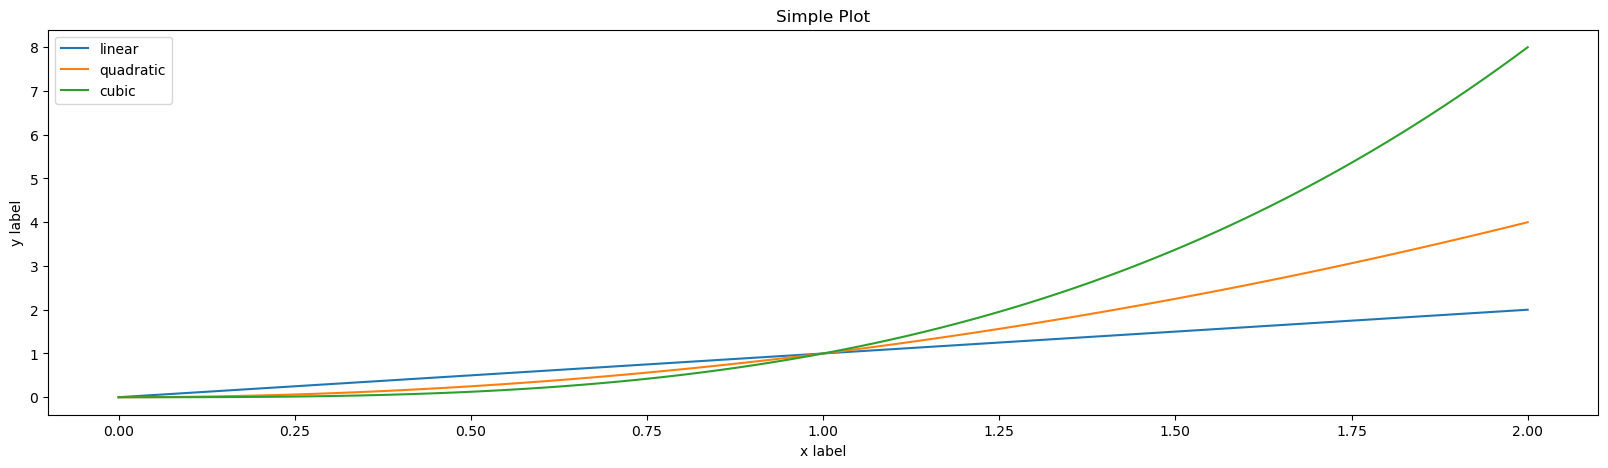

In [9]:
# A magic command to enable matplotlib figures in notebook!!!
%matplotlib inline 

# import
import matplotlib.pyplot as plt
import numpy as np 


# create an empty figure
fig = plt.figure()  # an empty figure 

plt.figure(figsize=(20,5))  # optional

x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Simple Plot")

plt.legend()

plt.show()

### Generate random data

In [6]:
from numpy import random

In [5]:
# uniform random numbers in [0,1]
random.rand(5,5)

array([[0.52080235, 0.70507082, 0.34521207, 0.30005819, 0.4537253 ],
       [0.24188637, 0.09488045, 0.47428305, 0.54626371, 0.73633118],
       [0.75069038, 0.49889214, 0.5817903 , 0.45203112, 0.9725177 ],
       [0.20647708, 0.99941961, 0.48184561, 0.09151475, 0.67785367],
       [0.11676884, 0.9797322 , 0.56651299, 0.23079691, 0.23711507]])

In [7]:
# standard normal distributed random numbers
random.randn(5,5)

array([[-0.26857078,  0.39901655,  0.96431481, -0.02823544, -2.12874396],
       [ 0.32448092,  0.33680674,  0.28191135, -0.64806177, -0.4474416 ],
       [-0.10887681,  0.33360309,  0.68379118, -0.73551761,  2.16809387],
       [ 0.87351395,  1.23871795, -0.35267306, -0.42750187, -0.36276692],
       [ 0.91887048,  0.9687357 , -1.20103268, -0.57236843,  0.41397363]])

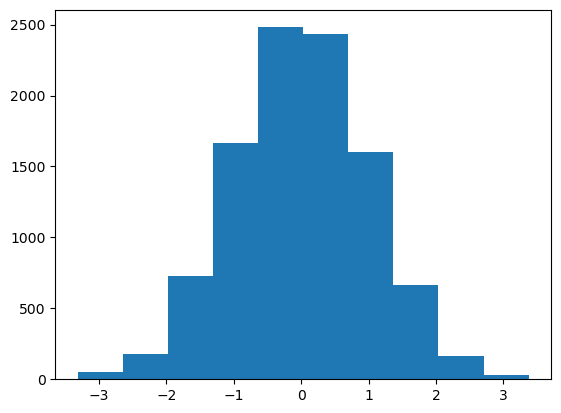

In [12]:
x = random.randn(10000)
plt.hist(x)
plt.show()

In [61]:
np.random.randint(0, 2, size=10)   # Return random integers from low (inclusive) to high (exclusive)

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1])

In [62]:
np.random.randint(0, 5, size=(2, 4))   # Return random integers from low (inclusive) to high (exclusive)

array([[2, 4, 4, 4],
       [1, 1, 2, 2]])